## 1) The CLT

The central limit theorem (CLT) states that the distribution of sample means approximates a normal distribution as the sample size grows larger, regardless of the population's initial distribution.

The CLT implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.

We can wrap it up the following way:

 $$ \large \bar{X} \approx_{n \rightarrow \infty} \mathcal{N}(\mu,\frac{\sigma}{\sqrt{n}}) $$

This Notebook aims to verify the CLT  experimentally with Python

---

##   2) The Dataset

 In this challenge, we will use the tips dataset from the seaborn library to illustrate the Central Limit Theorem.

In [2]:
# --- Data Manipulation ---
import numpy as np
import pandas as pd

# --- Data Visualization ---
import seaborn as sns
import matplotlib.pyplot as plt

# --- Maths ---
import math

In [3]:
tips_df = sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


##   2.1) Exploratory Data Analysis (EDA)

Rows available in the dataset:

In [4]:
len(tips_df)

244

 Plotting the distribution of the tip column  (with 20 bins)

<AxesSubplot:xlabel='tip', ylabel='Count'>

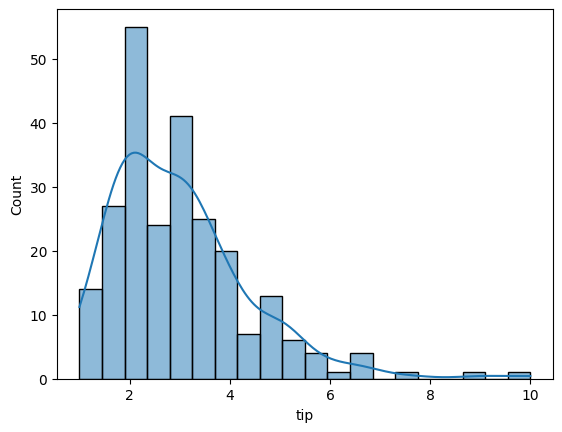

In [5]:
sns.histplot(tips_df.tip, kde=True, bins = 20)

 Question 1 

What are :
* the ***average tip***
* the ***standard deviation tip*** 
* the  ***skewness of the tips***


These shall be stored into three variables respectively called tips_mu, tips_sigma and tips_skew

In [6]:
tips_mu = tips_df.tip.mean()
print(round(tips_mu,2))
tips_sigma = tips_df.tip.std()
print(round(tips_sigma,2))

3.0
1.38


 Question 2 

What is the skewness of the tips: left, right, non-skewed? The answer shall be stored in a string variable called skewness

In [7]:
skewness = 'right'

In [8]:
tips_df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

Answer for the question related to the skewness:

* the mode seems to be around 2 dollars (we cannot talk about a mode for a continuous variable but just looking at the histogram with 20 bins, we can give an estimation)

* the mean is at 2.99 dollars

* the median is at 2.90 dollars

So here we have a mode, median  and mean  which correspond to a right skewness 

##  2.2) Sampling mean

 Pick randomly - and with replacement - 10 rows of the dataset, and compute the mean of that sample 

In [9]:
tips_df.tip.sample(10, replace=True).mean()

2.5949999999999998

---

##  3) Applying the CLT

##  3.1) Graphically

First, we shall create a means list storing a list of means of N samples of size n, starting with n  5 and N  10.

In the same cell, we will plot the distribution of means. 

We can play with the sample size and the number of samples: keeping n constant, and increasing N

<AxesSubplot:ylabel='Count'>

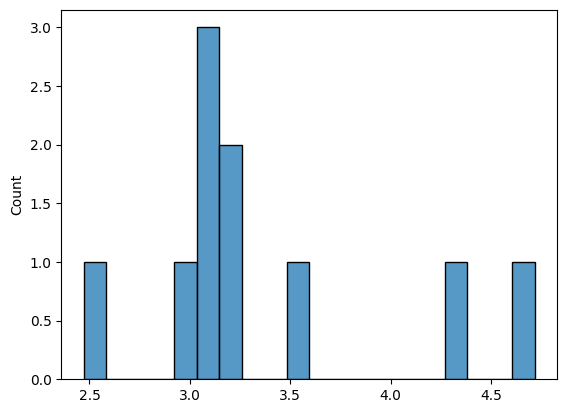

In [10]:
n = 5
N = 10
means = [tips_df.tip.sample(n, replace=True).mean() for i in range(N)]

sns.histplot(means, bins=20)

<AxesSubplot:ylabel='Count'>

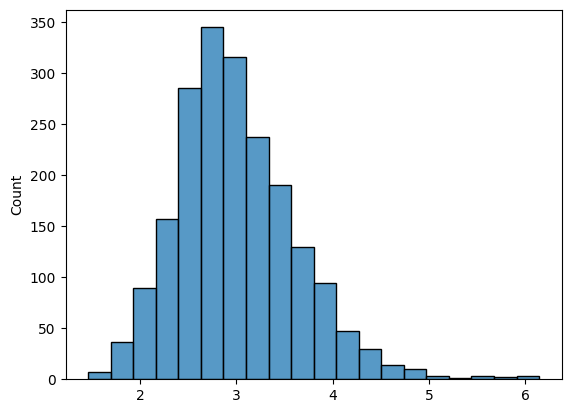

In [11]:
n = 5
N = 2000
means = [tips_df.tip.sample(n, replace=True).mean() for i in range(N)]

sns.histplot(means, bins=20)

We see that when n is fixed and N increases:

* N (how many times we sample) controls the random noise. 

* When large enough, histograms always look the same when we re-run the cell. 

Now, we shall keep N constant, increase n and observe:

<AxesSubplot:ylabel='Count'>

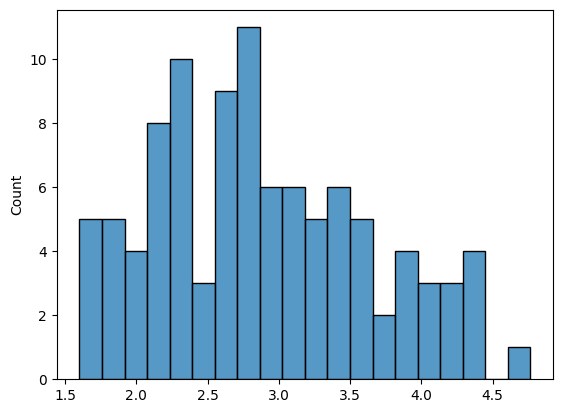

In [12]:
n = 2
N = 100
means = [tips_df.tip.sample(n, replace=True).mean() for i in range(N)]

sns.histplot(means, bins=20)

<AxesSubplot:ylabel='Count'>

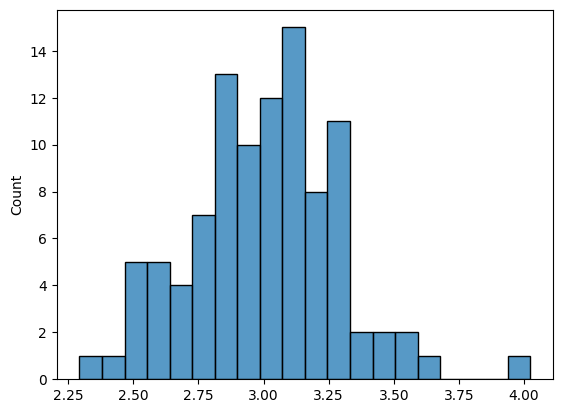

In [13]:
n = 30 # CLT applies mostly with n greater than 30
N = 100
means = [tips_df.tip.sample(n, replace=True).mean() for i in range(N)]

sns.histplot(means, bins=20)

When N is fixed and n increases:

* n (sample size) controls the shape of the distribution. 

* When large enough, it converges towards a Normal distribution. This is the Central Limit Theorem. 



## 3.2) Numerically

To verify the Central Limit Theorem computationally we shall:
- Compare tips_mu with the mean of means
- Compare tips_sigma with the standard deviation of the means, with the sqrt n adjustment
- Compute the skewness of the distribution of the means using scipy.stats.skew (should be close to 0)
- Compute the kurtosis of the distribution of the means using scipy.stats.kurtosis(should be close to 0)


In [14]:
from scipy.stats import skew, kurtosis

index_df = ['mean', 'stdev', 'skewness', 'kurtosis']
theory = [tips_mu, tips_sigma/np.sqrt(n), 0, 0]
real_life = [np.mean(means), np.std(means), skew(means), kurtosis(means)]
comparison_df = pd.DataFrame(list(zip(theory,real_life)),
                             columns = ["CLT Theory","Real Tips"],
                             index = index_df)
round(comparison_df,2)

,CLT Theory,Real Tips
mean,3.00,3.00
stdev,0.25,0.29
skewness,0.00,0.25
kurtosis,0.00,0.71


##   4) Use case: Probabilities of accumulating large tips at the end of a work-day

Picking 100 meals from the dataset, sampling with replacement, we shall compute the probability that the cumulative tips end up being greater than 350


##  4.1) The scipy.stats.norm.pdf tool

We will use the scipy.stats.norm.pdf tool: 

First, we shall use the tool to plot a Normal Distribution with a mean and standard deviation of choice

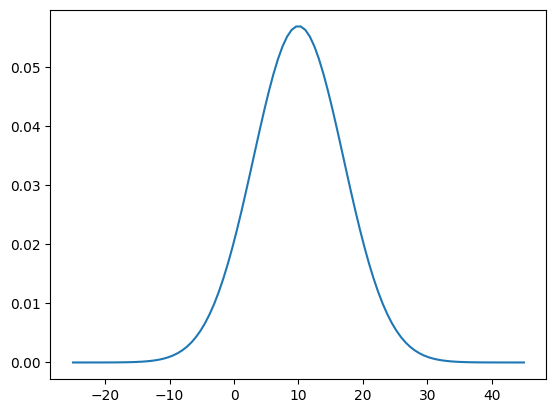

In [15]:
from scipy.stats import norm

mu_example = 10
sigma_example = 7

norm_example = norm(mu_example, sigma_example)
x = np.linspace(mu_example - 5*sigma_example, mu_example + 5 *sigma_example, 100)
plt.plot(x, norm_example.pdf(x))


The probability density function of a Normal Distribution with parameters  mu  and  sigma  is defined by:

$$ y = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} (\frac{x - \mu}{\sigma})^2}$$

Without this function from Scipy, we would have to define a Gaussian Probability Density Function by ourselves to plot the Gaussian Curve.

In [17]:
def gaussian_probability_density_function(mu,sigma, x):
    return 1/(sigma * np.sqrt(2*(math.pi))) * np.exp(- (1/2)*((x-mu)/sigma)**2)

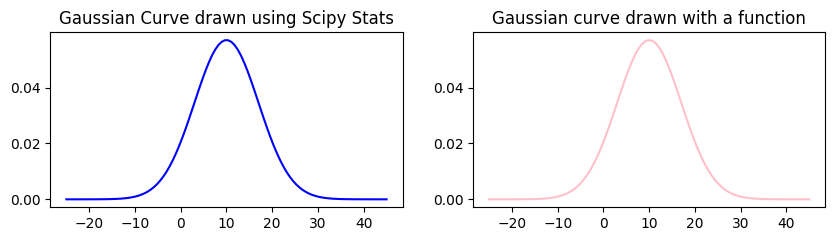

In [18]:
mu_example = 10
sigma_example = 7

# start a figure
plt.figure(figsize=(10,5))

# First subplot :
# Plotting a Gaussian distribution using Scipy Stats
plt.subplot(2,2,1)
plt.plot(x, norm(mu_example, sigma_example).pdf(x), c="blue")
plt.title("Gaussian Curve drawn using Scipy Stats");

# Second subplot :
# Plotting a Gaussian distribution using our own Python function
plt.subplot(2,2,2)
plt.plot(x, gaussian_probability_density_function(mu_example, sigma_example, x), c="pink")
plt.title("Gaussian curve drawn with a function");


 As demonstrated above, scipy.stats.norm.pdf is a convenient way to draw a Gaussian curve.


## 2) Back to the tips exercise

From our Exploratory Data Analysis, we have:
- 244 tips (global population)
- mu = 3
- sigma = 1.38


 We shall take a sample of size  n = 100, which can be considered large enough to apply the Central Limit Theorem (CLT) 

 If we were to repeat this experiment (i.e. randomly picking a sample of size 100) an infinite number of times, the distribution of sample mean would become exactly a normal distribution.

 A Gaussian distribution is fully characterized by its mean and its standard deviation

Therefore we would expect the following:
- Shape = Gaussian
- mu_expected = mu
- sigma_expected = sigma /  sqrtn 

We shall then plot this expected distribution, adding the datapoint representing a cumulated tip of 350 over 100 meals.

In [19]:
tips_df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

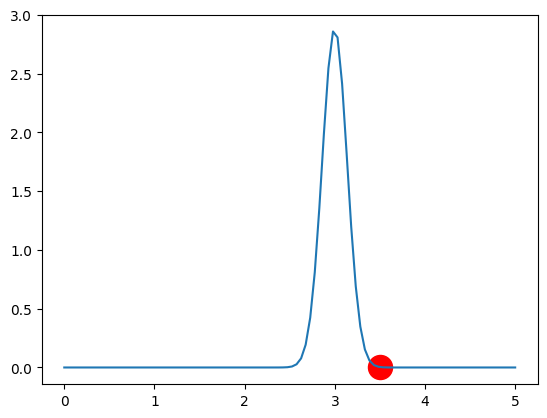

In [21]:
# Expected parameters of the Gaussian variable from the CLT
n = 100
mu_expected = tips_mu
sigma_expected = tips_sigma/np.sqrt(n)

# Instantiating this Gaussian Variable
norm_expected = norm(mu_expected, sigma_expected)

# Plotting the Gaussian Curve
x = np.linspace(0, 5, 100) # Most of the tips are between 0 and 5 euros
y = norm_expected.pdf(x)
plt.plot(x, y)

# Adding the targeted point
plt.scatter(350/100, norm_expected.pdf(350/100), c='r', s = 300)

For this restaurant, we clearly see that 350 euros of accumulated tips over 100 meals (average tip of 3.50 euros) seems to be virtually impossible (the probability of this event would be close to zero).

We shall now denote the average tip over 100 meals, by computing numerically $ \mathbb{P} ( \bar{X} > 3.50 ) $ and storing it in a `proba_350` variable. We will use the cumulative distribution function (cdf) from scipy.stats.norm

In [22]:
proba_350 = 1 - norm_expected.cdf(3.5)
proba_350

0.00014386590520809595

In [23]:
print(f"Probability to observe total tips greater than 350€ = {round(proba_350*100,2)} %")

Probability to observe total tips greater than 350€ = 0.01 %


 If we had observed such an amount, we could have deduced with a 99.99% confidence level that the 100 meals selected were NOT randomly sampled from the population of meals.

##   5) The z-score

We shall now use the z-score to attempt an alternative computation of the probability that the sum of these 100 sample tips is 350.

To compute the probability density function of a custom-made Gaussian distribution numerically, we could use the Standard Normal distribution mathcal N(0,1), from which we could read usual values in a Standard Statistical table. 

$$ X \sim \mathcal N(\mu,\sigma) \leftrightarrow Y =  \frac{X - \mu}{\sigma} \sim \mathcal N(0,1) $$

<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/math/z-table.png'>

First, we shall compute the z-score of the observation, and store it into a variable z


* sample size  n  100
* mean   3.5 

 The z-score of a measured observation x is the value of the observation, measured by the number of standard deviations above or below the mean of the underlying distribution from which the observation is derived.

In our case, the value we observe is 3.5, and the underlying distribution from which this observation was made is the means of samples (of size 100), which is Gaussian/normal with a mean mu and a std sigma over sqrt100 according to the CLT.

In [24]:
z = ((350/100) - tips_mu) / (tips_sigma/np.sqrt(100))
z

3.626101935200211

Using the standard table above to find the probability we are looking for: a z-score of 3.62 corresponds to an area under the curve of the Normal distribution  mathcalN(0,1) with a surface equal to 0.9998

Hence, the probability of having the sum of tips greater than 350 euros is equal to  0.0002

We shall now double-check this probability with with scipy.stats.norm as done previously, and store it into a proba_z variable.

In [25]:
proba_z = None

0.0001

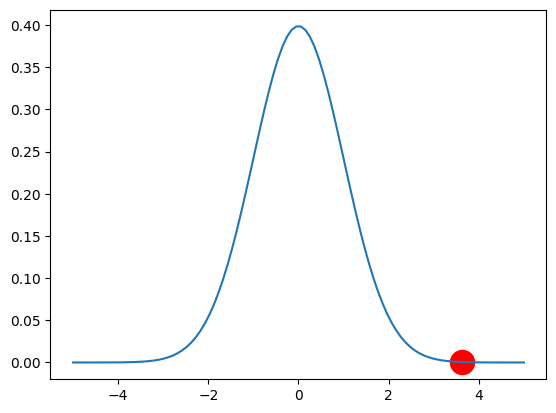

In [26]:
from scipy import stats

# --- Drawing a Standard Gaussian Curve with mean 0 and std 1
standard_gaussian = stats.norm()
x = np.linspace(-5, 5, 100)
y = standard_gaussian.pdf(x)
plt.plot(x, y)

# --- Adding the z-score of the observations on top of it
plt.scatter(z, standard_gaussian.pdf(z), c='r', s = 300)

# --- Computing the cdf of z
cumulated_z = standard_gaussian.cdf(z)

# --- Computing the proba that the standard gaussian is above the z-score
proba_z = 1 - cumulated_z
round(proba_z,4)